<a href="https://colab.research.google.com/github/vkstar444/Telcom-Customer-Churn-Dataset-Analysis/blob/main/Telcom_Customer_Churn_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

Load the Telco Customer Churn dataset into a pandas DataFrame.


Load the data into a pandas DataFrame and display the first few rows and information.



In [4]:
df = pd.read_csv('/content/Telco_Cusomer_Churn.csv')
display(df.head())
display(df.info())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

## Explore the data


Perform exploratory data analysis (EDA) to understand the data distribution, identify missing values, and visualize relationships between features and the target variable (Churn).



Display descriptive statistics for numerical columns, check for missing values, and visualize the distribution of the 'Churn' column.



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


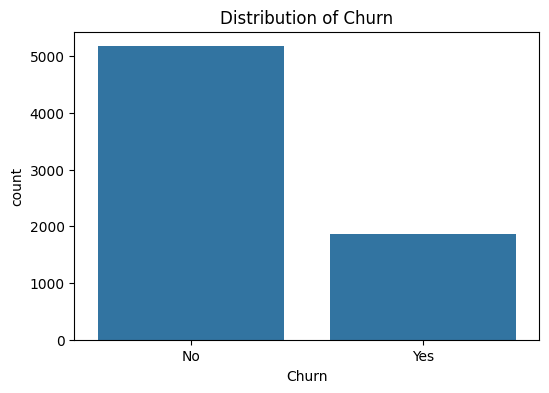

In [5]:
display(df.describe())
display(df.isnull().sum())
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

Visualize the distribution of relevant categorical features and their relationship with 'Churn' using count plots.



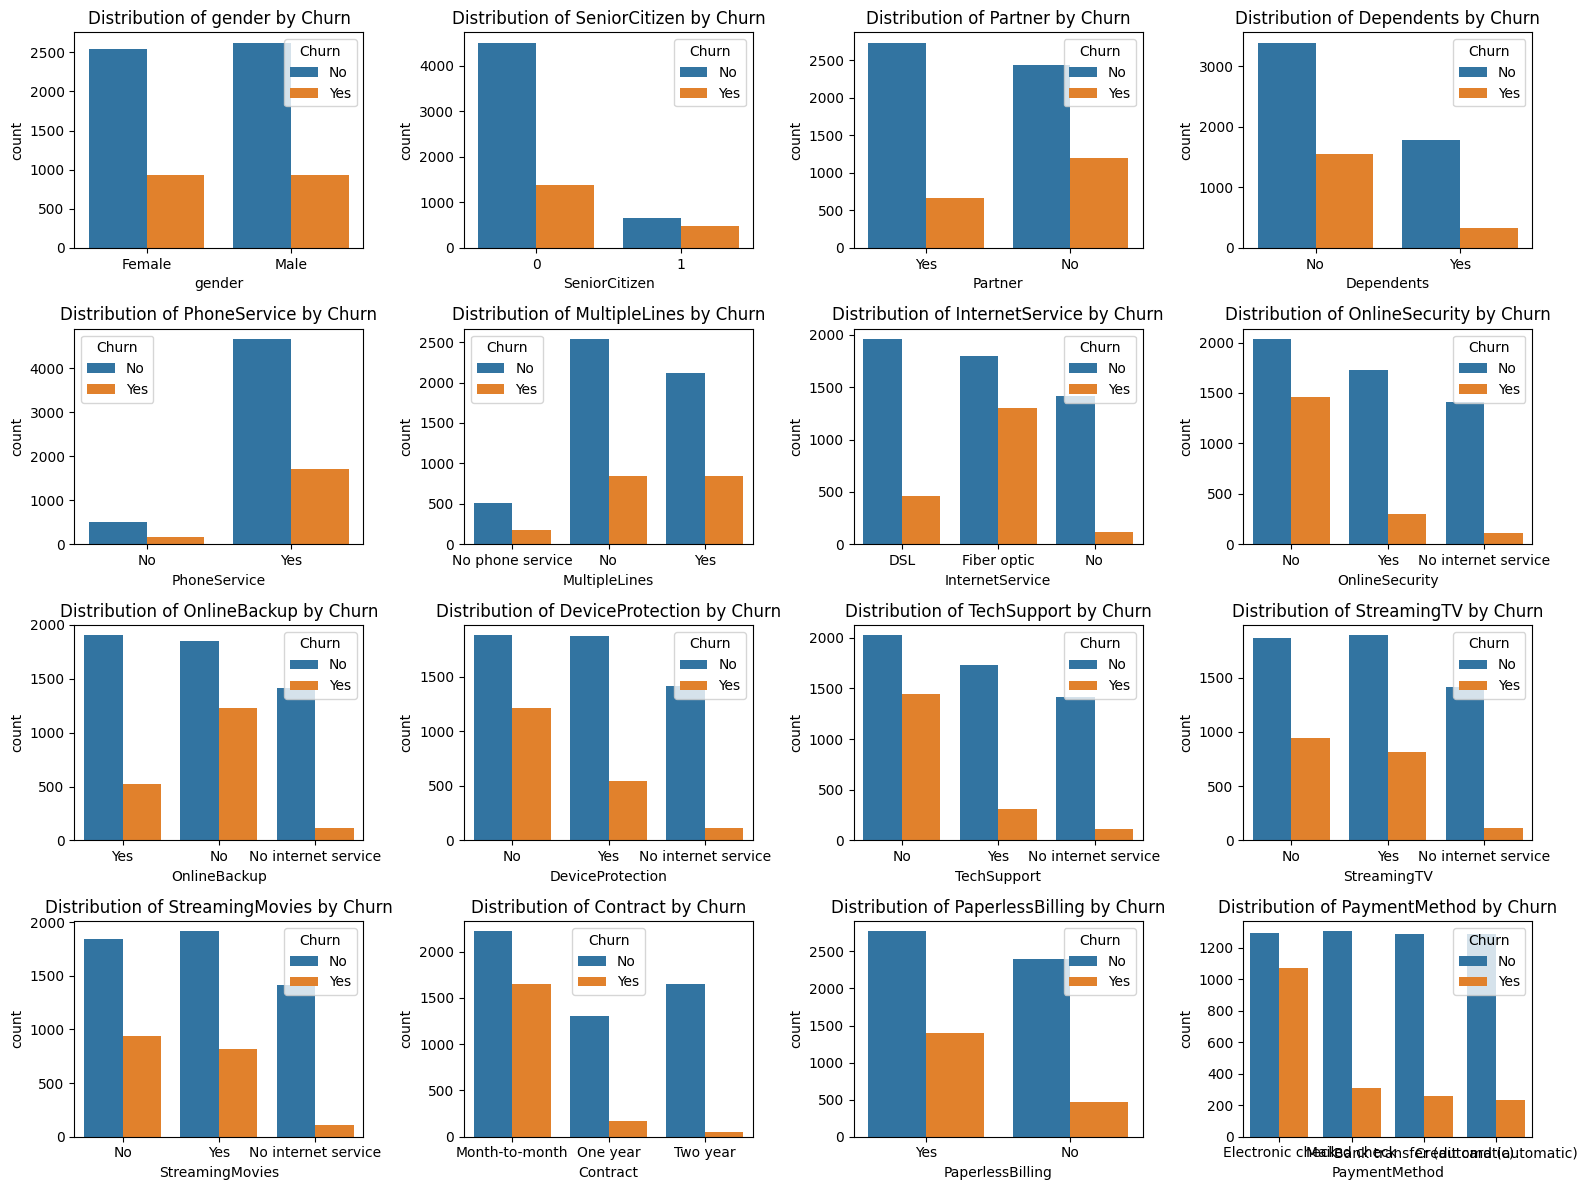

In [6]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()

Convert 'TotalCharges' to a numerical type and then visualize the distributions of numerical features using histograms and the relationship between numerical features and 'Churn' using box plots.



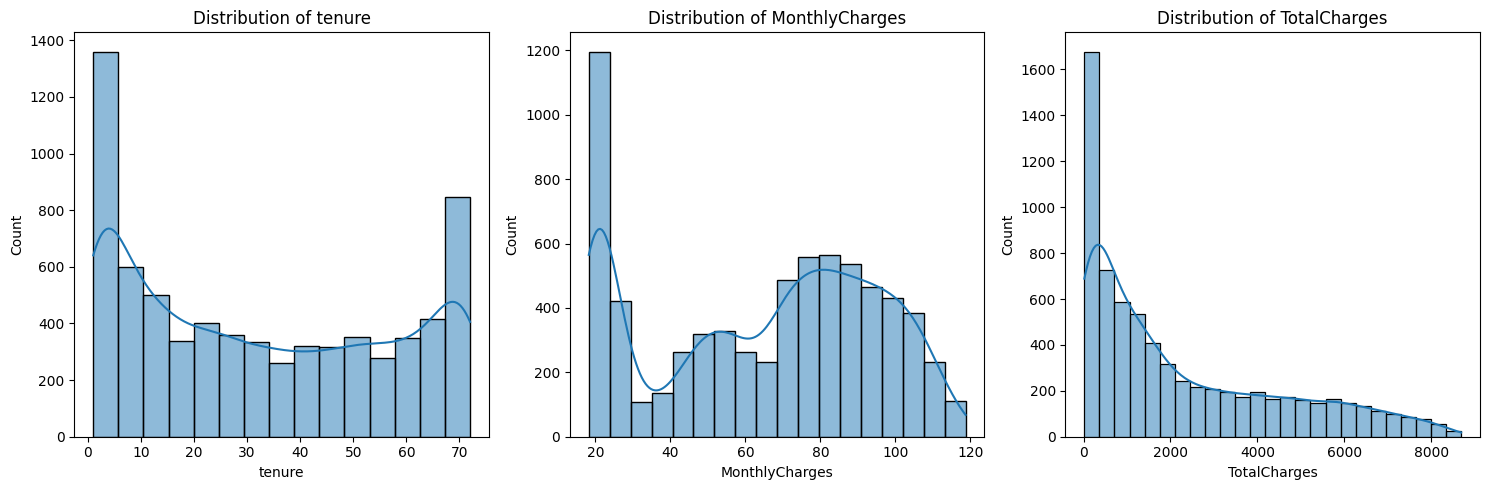

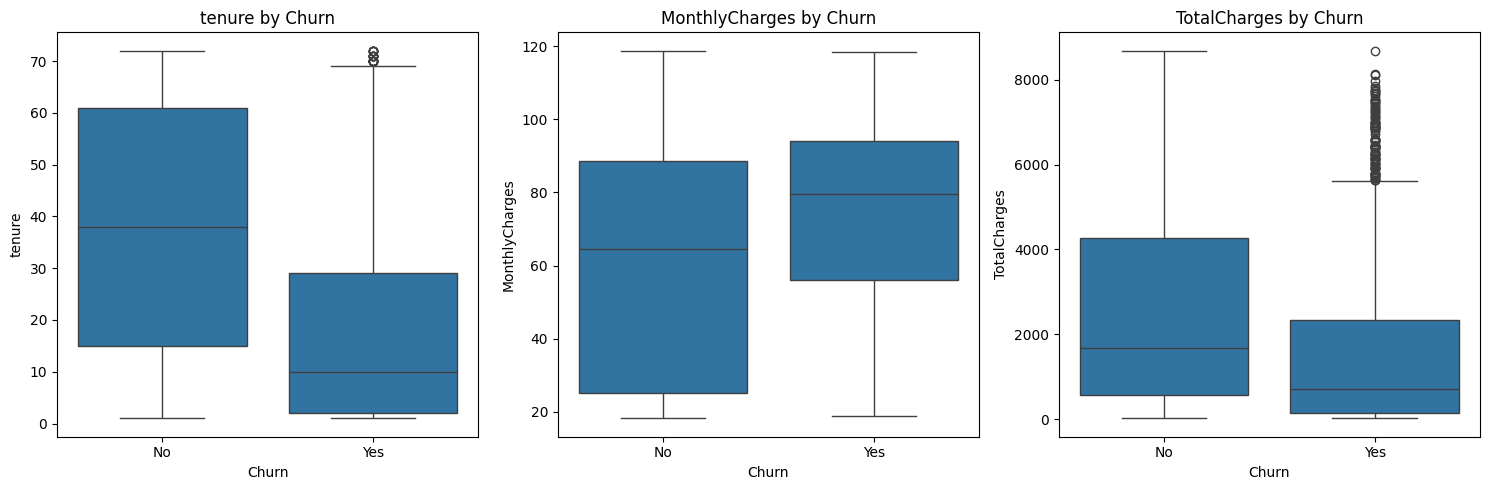

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
plt.tight_layout()
plt.show()

## Preprocess the data

Handle missing values, encode categorical features, and scale numerical features.


Identify categorical and numerical columns, apply one-hot encoding to categorical columns, apply standard scaling to numerical columns, encode the target variable, and concatenate the processed features into a single DataFrame as per the instructions.



In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')
categorical_features.remove('customerID')

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('SeniorCitizen') # SeniorCitizen is treated as categorical

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X = preprocessor.fit_transform(df.drop(['Churn', 'customerID'], axis=1))

# Encode the target variable
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert the processed features back to a DataFrame (optional, but good for inspection)
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

X_processed = pd.DataFrame(X, columns=all_feature_names, index=df.index)

display(X_processed.head())
display(y.head())

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,Churn
0,0
1,0
2,1
3,0
4,1


## Split the data

Split the dataset into training and testing sets.


Split the preprocessed data into training and testing sets.



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 44)
X_test shape: (1407, 44)
y_train shape: (5625,)
y_test shape: (1407,)


## Build and train models

Choose appropriate machine learning models for churn prediction and train them on the training data.


Import the necessary classification models, instantiate them, and train them on the training data.



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate the models
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate the models

Evaluate the performance of the trained models using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC).


Import the necessary metrics from sklearn.metrics and then iterate through the trained models to make predictions and calculate evaluation metrics.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = [log_reg_model, dt_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * (len(name) + 6))

--- Logistic Regression ---
Accuracy: 0.7882
Precision: 0.6218
Recall: 0.5187
F1-score: 0.5656
AUC: 0.8324
-------------------------
--- Decision Tree ---
Accuracy: 0.7292
Precision: 0.4905
Recall: 0.4813
F1-score: 0.4858
AUC: 0.6502
-------------------
--- Random Forest ---
Accuracy: 0.7740
Precision: 0.5979
Recall: 0.4572
F1-score: 0.5182
AUC: 0.8087
-------------------
--- Gradient Boosting ---
Accuracy: 0.7946
Precision: 0.6491
Recall: 0.4947
F1-score: 0.5615
AUC: 0.8358
-----------------------


## Interpret model results

Analyze the model results to understand which features are important for predicting churn.



Extract and display feature importances for tree-based models and coefficients for Logistic Regression to understand which features influence churn prediction.



In [12]:
# Get feature names from X_processed
feature_names = X_processed.columns

# Feature importances for Decision Tree
dt_importances = pd.Series(dt_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("--- Decision Tree Feature Importances (Top 10) ---")
print(dt_importances.head(10))
print("-" * 45)

# Feature importances for Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\n--- Random Forest Feature Importances (Top 10) ---")
print(rf_importances.head(10))
print("-" * 46)

# Feature importances for Gradient Boosting
gb_importances = pd.Series(gb_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\n--- Gradient Boosting Feature Importances (Top 10) ---")
print(gb_importances.head(10))
print("-" * 49)

# Coefficients for Logistic Regression
# The magnitude of the coefficient indicates the strength of the relationship, and the sign indicates the direction.
log_reg_coef = pd.Series(log_reg_model.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
print("\n--- Logistic Regression Coefficients (Top 10 by absolute value) ---")
print(log_reg_coef.head(10))
print("-" * 62)

# Summarize key features across models
print("\n--- Summary of Key Features ---")
print("Features consistently important across tree-based models:")
# Find common top features (example: top 5 from each tree model)
top_dt_features = set(dt_importances.head(5).index)
top_rf_features = set(rf_importances.head(5).index)
top_gb_features = set(gb_importances.head(5).index)

common_tree_features = list(top_dt_features.intersection(top_rf_features, top_gb_features))
print(common_tree_features)

print("\nFeatures with high absolute coefficients in Logistic Regression:")
print(log_reg_coef.head(5).index.tolist())

print("\nOverall influential features:")
# Combine and show features that appear in top lists across models
influential_features = set(dt_importances.head(10).index)
influential_features.update(rf_importances.head(10).index)
influential_features.update(gb_importances.head(10).index)
influential_features.update(log_reg_coef.head(10).index)

print(list(influential_features))

--- Decision Tree Feature Importances (Top 10) ---
MonthlyCharges                    0.191012
TotalCharges                      0.187231
Contract_Month-to-month           0.170461
tenure                            0.115207
InternetService_Fiber optic       0.052441
PaymentMethod_Electronic check    0.021696
gender_Male                       0.016203
PaperlessBilling_No               0.015078
PaperlessBilling_Yes              0.014848
Partner_No                        0.014161
dtype: float64
---------------------------------------------

--- Random Forest Feature Importances (Top 10) ---
TotalCharges                      0.163779
MonthlyCharges                    0.146926
tenure                            0.146422
Contract_Month-to-month           0.049689
TechSupport_No                    0.033483
OnlineSecurity_No                 0.030691
PaymentMethod_Electronic check    0.027251
InternetService_Fiber optic       0.023189
gender_Female                     0.017891
gender_Male        

## Summary:

### Data Analysis Key Findings

*   The dataset contains 7043 entries and 21 columns, with most features being categorical.
*   The `TotalCharges` column initially contained non-numeric values, which were handled by coercing to numeric and dropping 11 resulting rows with missing values.
*   The dataset exhibits class imbalance, with more customers who did not churn than those who did.
*   Customers with month-to-month contracts, no online security, or no tech support appear to have higher churn rates.
*   Customers who churned generally had lower `tenure` and `TotalCharges`, but slightly higher `MonthlyCharges` on average.
*   The data was successfully preprocessed by encoding categorical features using one-hot encoding and scaling numerical features using StandardScaler, resulting in 44 features.
*   The dataset was split into training (80%, 5625 samples) and testing (20%, 1407 samples) sets.
*   Four models (Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting) were trained for churn prediction.
*   Model evaluation on the test set showed varying performance metrics. Gradient Boosting achieved the highest Accuracy (0.7946) and AUC (0.8358) among the evaluated models.
*   Features consistently important across tree-based models include `TotalCharges`, `MonthlyCharges`, `tenure`, and `Contract_Month-to-month`.
*   Logistic Regression identified `tenure`, `Contract_Two year`, `TotalCharges`, and `Contract_Month-to-month` as having the highest absolute coefficients, indicating strong relationships with churn probability.
*   Overall influential features identified across models include `tenure`, `MonthlyCharges`, `TotalCharges`, `Contract_Month-to-month`, various internet service and security features, and payment method.

### Insights or Next Steps

*   The class imbalance in the target variable should be addressed in future modeling steps using techniques like oversampling, undersampling, or using evaluation metrics more robust to imbalance (like F1-score or AUC) for model selection.
*   Further model tuning using techniques like cross-validation and hyperparameter optimization could potentially improve the performance of the trained models, especially for the tree-based models.
